NaN values per feature:
Face                      0
Hair length               0
Hair style and texture    0
Height                    0
Torso                     0
Limbs                     0
Top-half clothing         0
Bottom-half clothing      0
Shoes                     0
Accessories               0
Assistive devices         3
Facial hair               4
dtype: int64
Total NaN values: 7
Percentage of data missing: 1.67%


Text(0.5, 0.95, 'Hierarchical Clustering of Avatar Features Based on Correlation\n(Pairwise Deletion for NaN Values)')

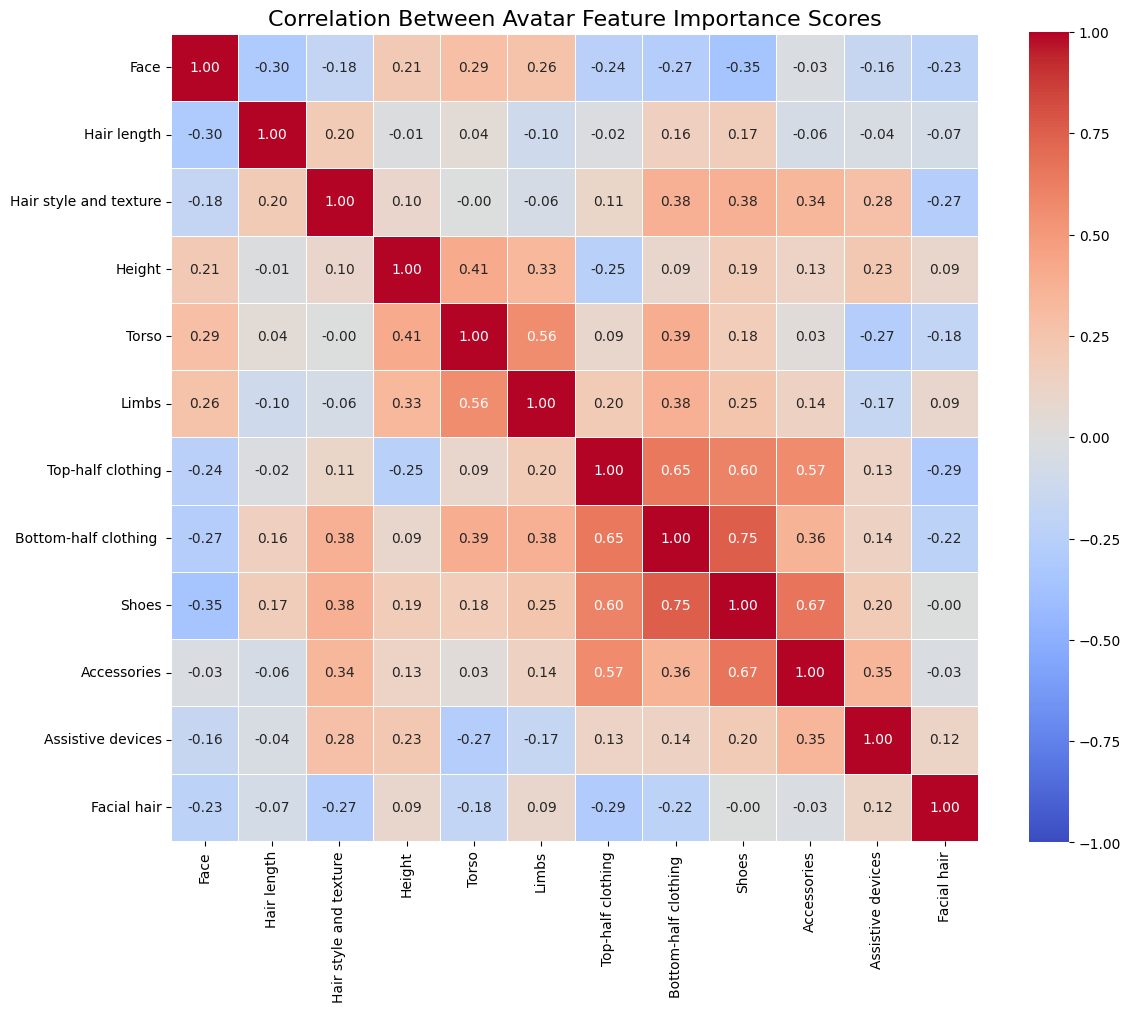

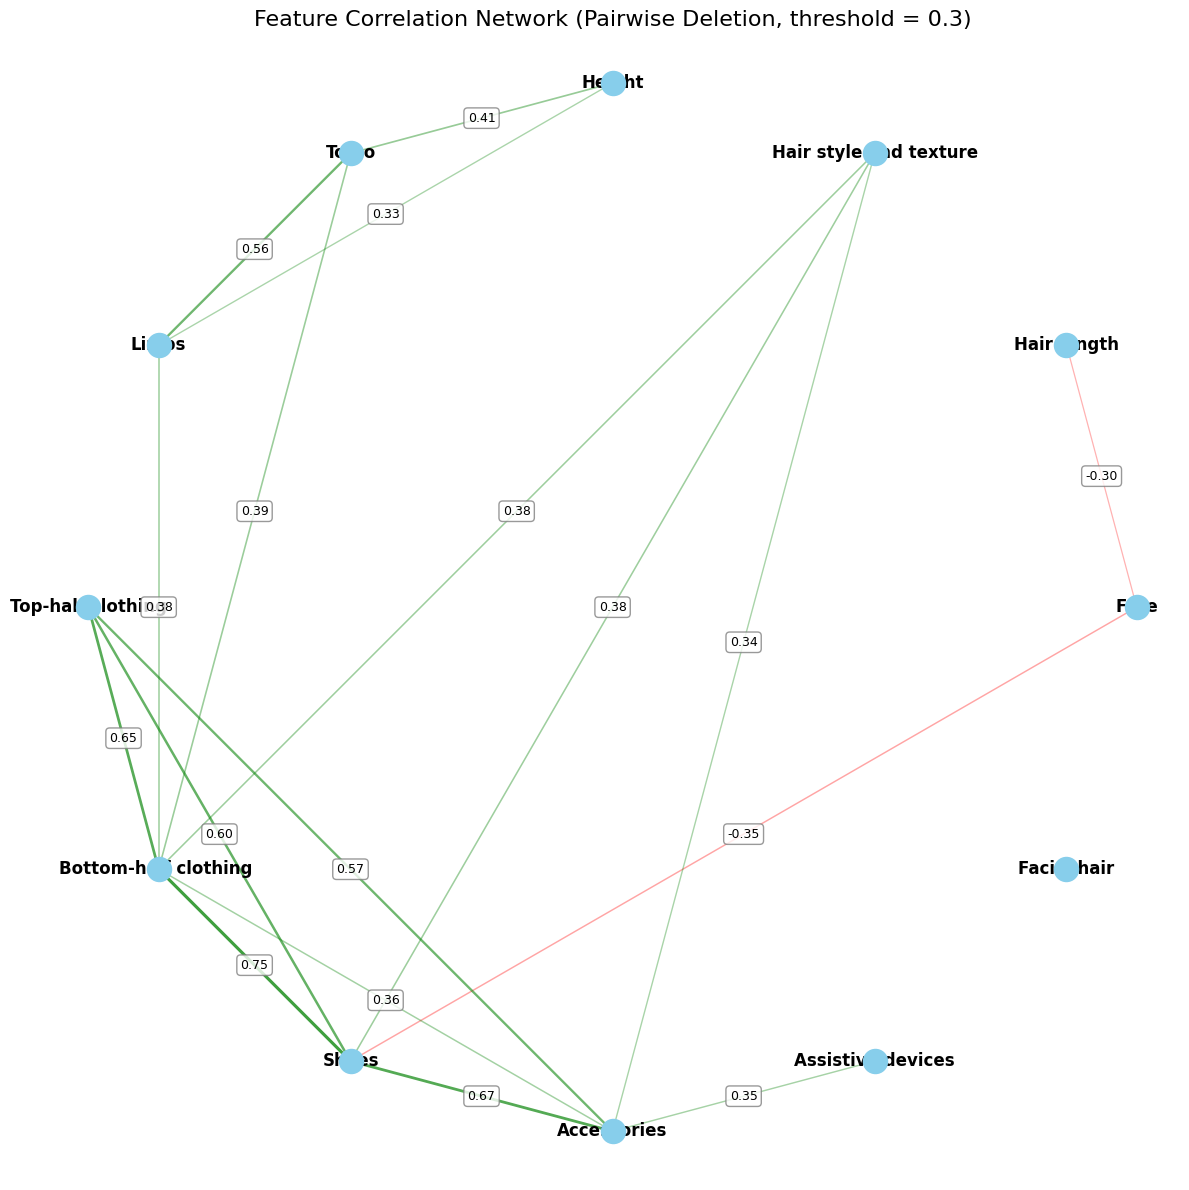

<Figure size 1400x1200 with 0 Axes>

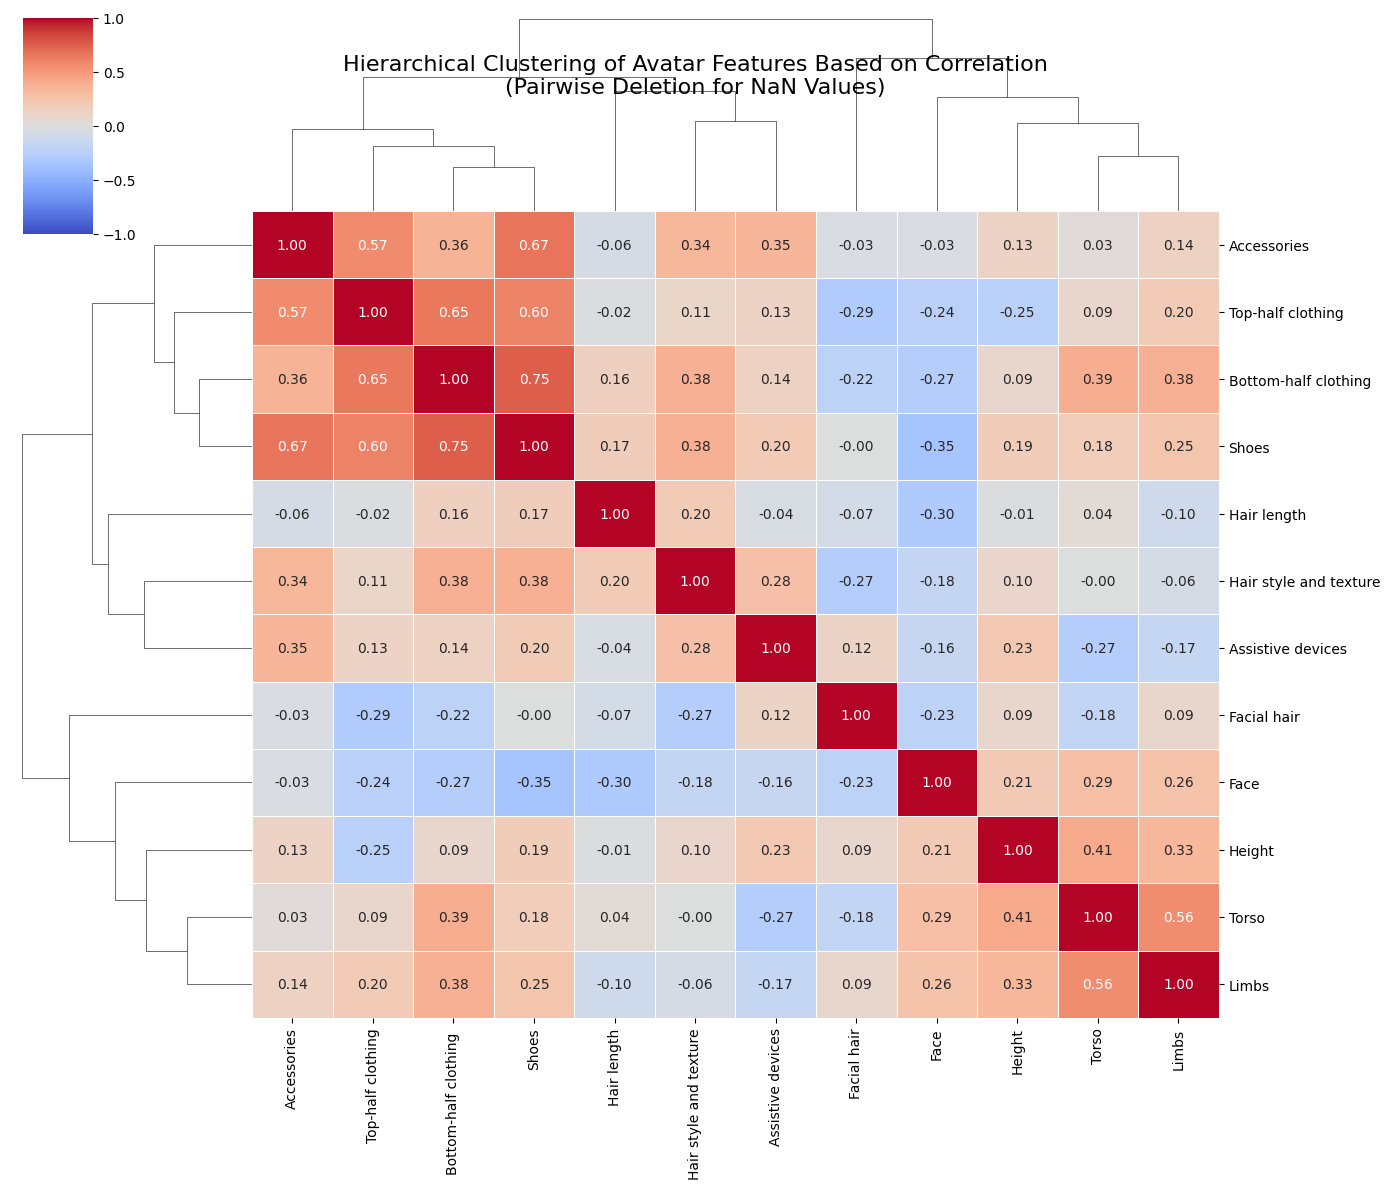

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's create a sample dataset based on your description
# Assuming 36 users rating 10 different avatar features on a scale of 1-5
features = [
    "Face","Hair length",'Hair style and texture','Height','Torso','Limbs','Top-half clothing','Bottom-half clothing' ,'Shoes','Accessories',"Assistive devices","Facial hair"
]

# # Generate sample data - backup to real data
# np.random.seed(42)  # For reproducibility
# num_users = 36
# data = {}
# for feature in features:
#     # Generate realistic ratings between 1-5
#     data[feature] = np.random.randint(1, 6, size=num_users)

# # Create DataFrame
# df = pd.DataFrame(data)

df = pd.read_csv('diss_users_study.csv', index_col=0)

# Print summary of NaN values
print("NaN values per feature:")
print(df.isna().sum())
print(f"Total NaN values: {df.isna().sum().sum()}")
print(f"Percentage of data missing: {(df.isna().sum().sum() / df.size) * 100:.2f}%")

# Calculate correlation matrix with pairwise deletion
correlation_matrix = df.corr(method='pearson')

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, 
           square=True, linewidths=.5, fmt=".2f")
plt.title("Correlation Between Avatar Feature Importance Scores", fontsize=16)
plt.tight_layout()

# Network visualization of correlations
def plot_correlation_network(corr_matrix, threshold=0.3):
    plt.figure(figsize=(12, 12))
    
    # Create coordinates in a circle for each feature
    n_features = len(corr_matrix)
    angles = np.linspace(0, 2*np.pi, n_features, endpoint=False)
    coords = np.column_stack([np.cos(angles), np.sin(angles)])
    
    # Plot nodes
    plt.scatter(coords[:, 0], coords[:, 1], s=300, c='skyblue', zorder=100)
    
    # Plot feature names
    for i, feature in enumerate(corr_matrix.index):
        plt.annotate(feature, xy=(coords[i, 0], coords[:, 1][i]), 
                     ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Plot edges for correlations above threshold
    for i in range(n_features):
        for j in range(i+1, n_features):
            corr = corr_matrix.iloc[i, j]
            if abs(corr) > threshold:
                # Width and color based on correlation strength
                width = abs(corr) * 3
                color = 'red' if corr < 0 else 'green'
                alpha = abs(corr)
                plt.plot([coords[i, 0], coords[j, 0]], 
                         [coords[i, 1], coords[j, 1]], 
                         alpha=alpha, linewidth=width, color=color)
                # Add correlation value
                mid_x = (coords[i, 0] + coords[j, 0]) / 2
                mid_y = (coords[i, 1] + coords[j, 1]) / 2
                plt.annotate(f"{corr:.2f}", xy=(mid_x, mid_y), 
                            ha='center', va='center', fontsize=9, 
                            bbox=dict(boxstyle="round,pad=0.3", 
                                     fc='white', ec="gray", alpha=0.8))
    
    plt.axis('equal')
    plt.axis('off')
    plt.title(f"Feature Correlation Network (Pairwise Deletion, threshold = {threshold})", fontsize=16)
    plt.tight_layout()

# Plot correlation network
plot_correlation_network(correlation_matrix, threshold=0.3)

# Hierarchical clustering of features based on correlation
plt.figure(figsize=(14, 12))
corr_linkage = sns.clustermap(
    correlation_matrix, 
    method="complete", 
    cmap="coolwarm",
    annot=True, 
    figsize=(14, 12), 
    fmt=".2f",
    linewidths=.5,
    dendrogram_ratio=0.2,
    vmin=-1, vmax=1
)
plt.suptitle("Hierarchical Clustering of Avatar Features Based on Correlation\n(Pairwise Deletion for NaN Values)", 
           fontsize=16, y=0.95)